# Problem Statement 

### To find whether the person is vaccinated or not

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Requirements

unqiue_id = Not Required, h1n1_vaccine = Dependent variable -> y, Classification

Models to be used -> LogisticRegression, DecisionTreeClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassiifier

In [97]:
df = pd.read_csv('h1n1_vaccine_prediction.csv')
pd.set_option('display.max_columns', None)
df.head(5)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [99]:
# Removing unqiue_id column as it is not required and changing None as non-binary status for better understanding
df.drop(['unique_id'], axis = 1, inplace = True)

In [100]:
df['marital_status'].replace({'None': 'Non-binary'}, inplace=True)

In [101]:
df.isnull().sum()

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [102]:
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


# Determine the distribution of charge
h1n1_dist = df["h1n1_vaccine"].values
logcharge = np.log(df["h1n1_vaccine"])



trace0 = go.Histogram(
    x=h1n1_dist,
    histnorm='probability',
    name="H1N1 Vaccine Distribution",
    marker = dict(
        color = '#FA5858',
    )
)
trace1 = go.Histogram(
    x=logcharge,
    histnorm='probability',
    name="H1N1 Vaccine Distribution using Log",
    marker = dict(
        color = '#58FA82',
    )
)

fig = tools.make_subplots(rows=2, cols=1,
                          subplot_titles=('H1N1 Vaccine Distribution','Log H1N1 Vaccine Distribution'),
                         print_grid=False)



fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)


fig['layout'].update(showlegend=True, title='H1N1 Vaccine Distribution', bargap=0.05)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

First we have to separate the categorical columns from numnerical ones to treat their null values separately

In [103]:
# categorical features with missing values
categorical_nan = [feature for feature in df.columns if df[feature].isna().sum()>0 and df[feature].dtypes=='O']
print(categorical_nan)

['qualification', 'income_level', 'marital_status', 'housing_status', 'employment']


In [104]:
df.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [105]:
# replacing missing values in categorical columns
for feature in categorical_nan:
    df[feature] = df[feature].fillna('None')

In [106]:
df[categorical_nan].isna().sum()

qualification     0
income_level      0
marital_status    0
housing_status    0
employment        0
dtype: int64

Now, let's deal with numerical missing values

In [107]:
# Lets first handle numerical features with nan value
numerical_nan = [feature for feature in df.columns if df[feature].isna().sum()>1 and df[feature].dtypes!='O']
numerical_nan

['h1n1_worry',
 'h1n1_awareness',
 'antiviral_medication',
 'contact_avoidance',
 'bought_face_mask',
 'wash_hands_frequently',
 'avoid_large_gatherings',
 'reduced_outside_home_cont',
 'avoid_touch_face',
 'dr_recc_h1n1_vacc',
 'dr_recc_seasonal_vacc',
 'chronic_medic_condition',
 'cont_child_undr_6_mnths',
 'is_health_worker',
 'has_health_insur',
 'is_h1n1_vacc_effective',
 'is_h1n1_risky',
 'sick_from_h1n1_vacc',
 'is_seas_vacc_effective',
 'is_seas_risky',
 'sick_from_seas_vacc',
 'no_of_adults',
 'no_of_children']

In [108]:
df[numerical_nan].isna().sum()

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
no_of_adults                   249
no_of_children                 249
dtype: int64

In [109]:
## Replacing the numerical Missing Values

for feature in numerical_nan:
    ## We will replace by using median since there are outliers
    median_value=df[feature].median()
    
    df[feature].fillna(median_value,inplace=True)
    
df[numerical_nan].isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
no_of_adults                 0
no_of_children               0
dtype: int64

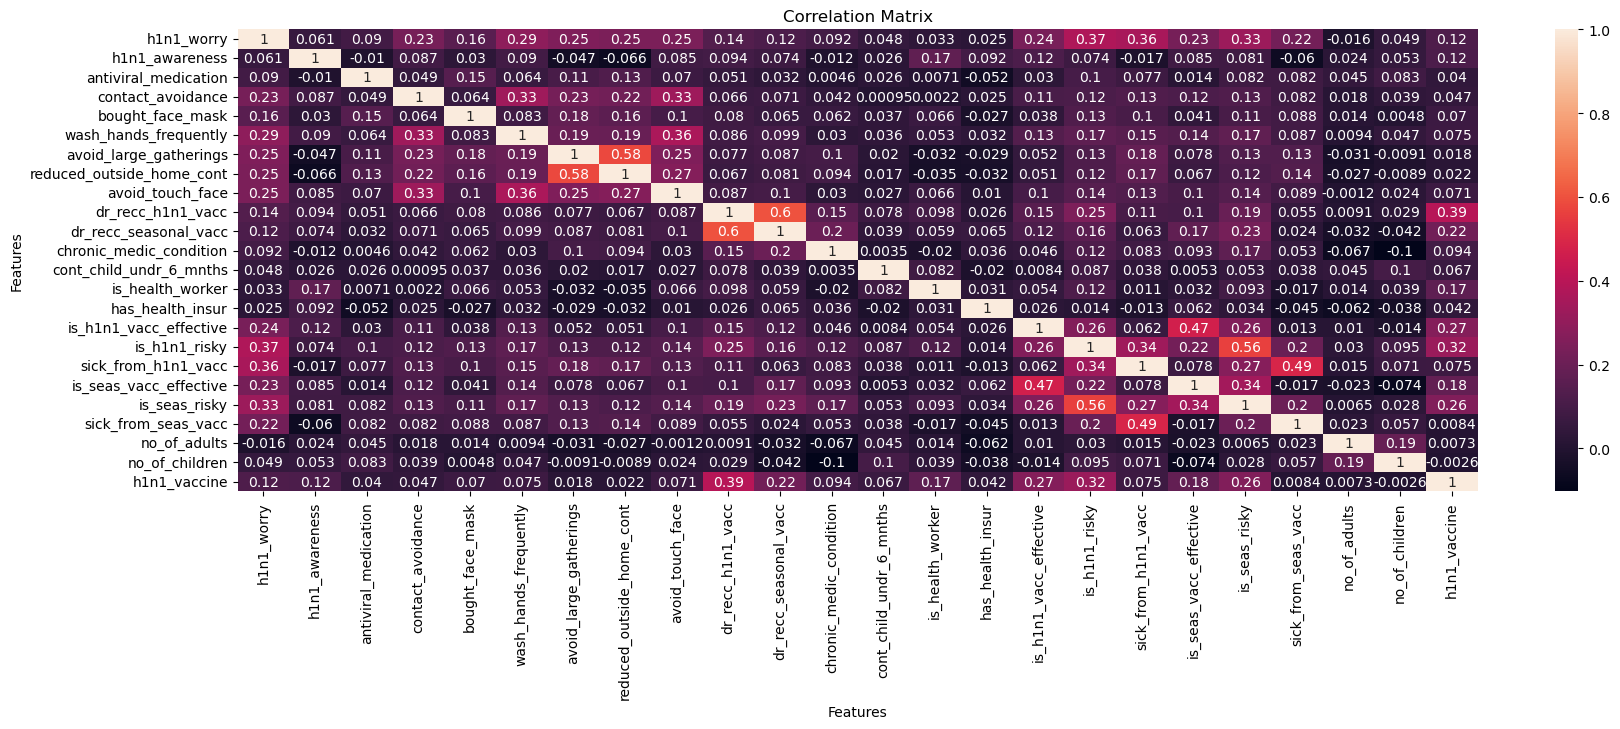

In [110]:
corr = df.corr()

plt.figure(figsize=(20, 6))

sns.heatmap(corr, annot=True)

plt.title("Correlation Matrix")
plt.xlabel("Features")
plt.ylabel("Features")

plt.show()

### Univariate Analysis

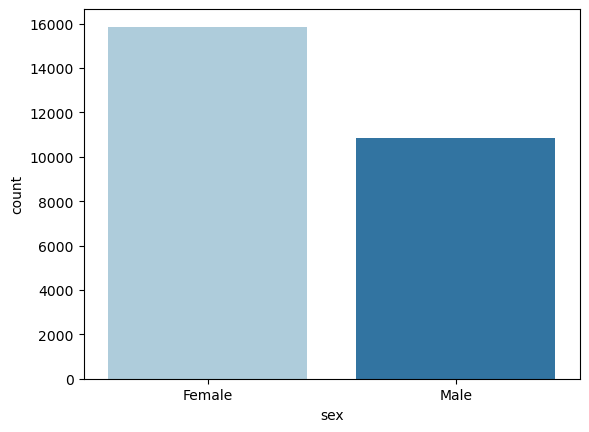

In [111]:
sns.countplot(x='sex', data = df, palette = 'Paired')
plt.show()
# Females are taking vaccination more than males

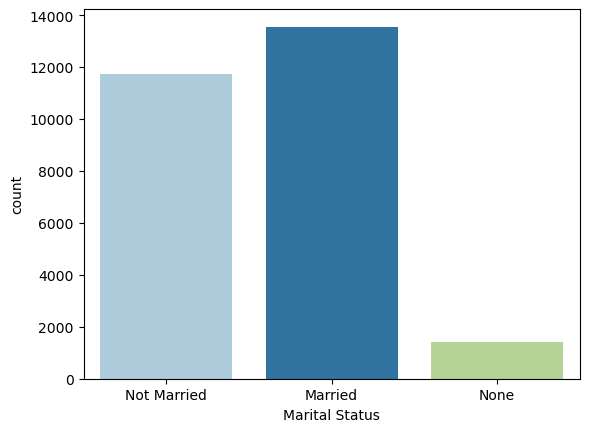

In [112]:
sns.countplot(x='marital_status', data = df, palette = 'Paired')
plt.xlabel('Marital Status')
plt.show()

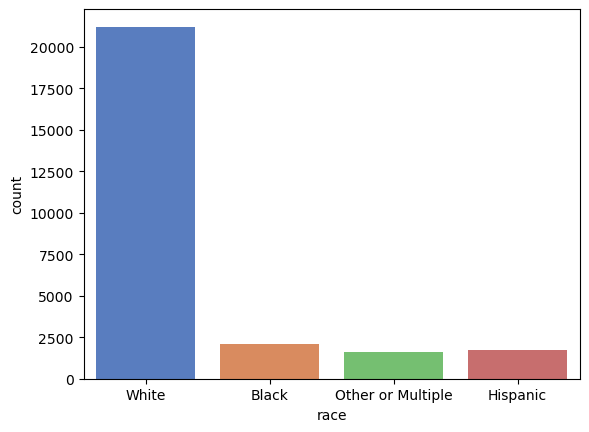

In [113]:
sns.countplot(x='race', data = df, palette = 'muted')
plt.show()
# Whites are vaccinated more than any other race.

## Bivariate Analysis

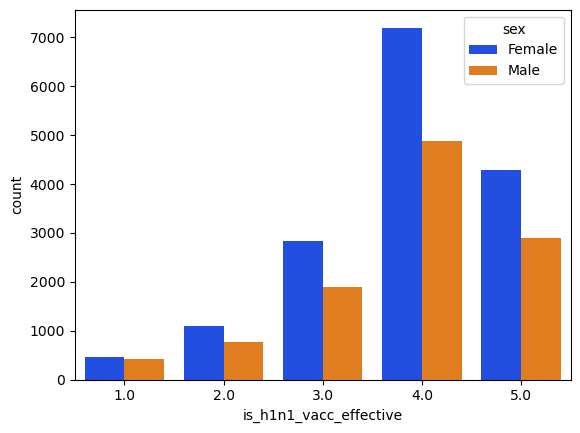

In [115]:
sns.countplot(x='is_h1n1_vacc_effective', hue='sex', data = df, palette = 'bright')
plt.show()
# It is visible that female count is higher as compared to male count when it comes to considering the effectiveness of h1n1 vaccine.

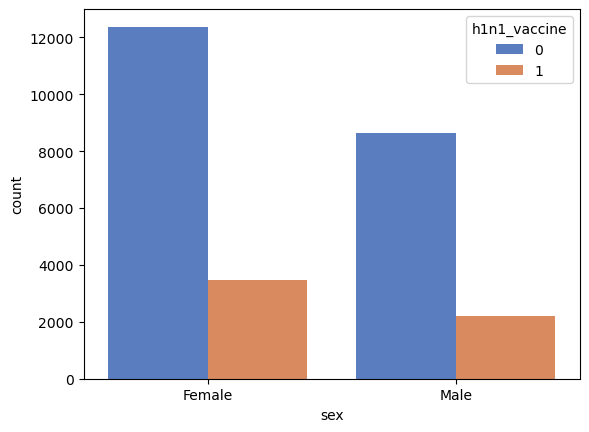

In [114]:
# As a result we can see that females are going for vaccination more than males.
sns.countplot(x='sex', hue='h1n1_vaccine', data = df, palette = 'muted')
plt.show()

### Label-Encoding

In [119]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [120]:
for f in df.columns:
    if df[f].dtypes == 'object':
        df[f] = le.fit_transform(df[f])
df.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,3,1,3,0,2,2,1,2,2,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,1,0,3,1,2,2,2,0,0,0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,0,2,3,1,0,2,1,0,0,2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,4,0,3,0,2,2,2,2,1,0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,2,4,3,0,0,0,1,0,0,1.0,0.0,0


Before we start building the machine learning model, let's clean the data by removing unwanted columns

In [121]:
# Removing columns
df.drop(['contact_avoidance', 'bought_face_mask', 'wash_hands_frequently', 'avoid_large_gatherings', 'reduced_outside_home_cont', 'avoid_touch_face'], axis=1, inplace=True)


In [122]:
df = pd.get_dummies(df)

## Machine Learning

h1n1_vaccine is a dependent variable -> y

As we are dealing with categorical dataset, therefore we have to use classification machine learning models

### Split Data

In [123]:
# Independent Variable

X = df.drop(['h1n1_vaccine'], axis = 1)

# dependent variable

y = df[['h1n1_vaccine']]

In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

### Logistic Regression

In [126]:
from sklearn.linear_model import LogisticRegression

In [127]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
print(lr.score(X_train, y_train))

0.8321477598901784
0.8368460468599551


### K-fold crossvalidation

In [128]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state = 0)

cross_val_score(LogisticRegression(), X, y, cv=cv)

array([0.83214776, 0.83401972, 0.83689005, 0.83451891, 0.83589168])

As, logistic regression is giving good results but let's try some other classification model to get the best results

### Grid Search CV

Through this we will use different hyper parameters and classification models to figure out which model works the best for this dataset

In [80]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

def find_best_model(X,y):
    algos = {
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion': ['mse', 'friedman_mse', 'gini'],
                'splitter': ['best', 'random'],
                'max_depth': [1, 2, 3, 4, 5]
            }
        },
        'bagging': {
            'model': BaggingClassifier(),
            'params': {
                'n_estimators': [10, 50, 100, 150],
                'max_features': [1, 2, 3, 4, 5]
            }
        },
        'ada': {
            'model': AdaBoostClassifier(),
            'params': {
                'n_estimators': [10, 20, 40, 60, 80],
                'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                'random_state': [10, 42, 60]
            }
        },
        'gradient': {
            'model': GradientBoostingClassifier(),
            'params': {
                'n_estimators': [10, 50, 100, 120],
                'random_state': [42, 50, 60]
            }
        },
        'forest': {
            'model': RandomForestClassifier(),
            'params': {
                'random_state': [3, 8, 10, 12],
                'max_features': [2, 4, 6, 8],
                'max_depth': [1, 2, 3, 4, 5]
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model(X,y)

,model,best_score,best_params
0,decision_tree,0.828479,"{'criterion': 'gini', 'max_depth': 5, 'splitte..."
1,bagging,0.790715,"{'max_features': 5, 'n_estimators': 10}"
2,ada,0.833695,"{'learning_rate': 0.3, 'n_estimators': 60, 'ra..."
3,gradient,0.838787,"{'n_estimators': 120, 'random_state': 42}"
4,forest,0.833296,"{'max_depth': 5, 'max_features': 8, 'random_st..."


In [85]:
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbc.fit(X_train, y_train)
print(gbc.score(X_test, y_test))
print(gbc.score(X_train, y_train))

0.8340197179583178
0.8446560393709212


## Confusion Matrix

<Axes: >

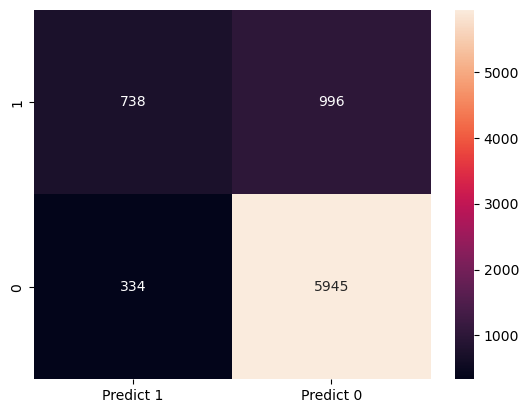

In [86]:
from sklearn import metrics
predictions = gbc.predict(X_test)

cm = metrics.confusion_matrix(y_test, predictions, labels = [1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ['1', '0']], 
                    columns = [i for i in ["Predict 1", "Predict 0"]])

sns.heatmap(df_cm, annot=True, fmt='g')

In [88]:
# this is how an accuracy of the model is calculated.
#acc = TP + TN/(FP + TP + FN + TN)
acc = 6683/8013
acc

0.8340197179583178